# IPP 2-3
started on 26/07/2019 for 2nd year report

In [5]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines
import matplotlib as mpl

import itertools
from itertools import chain
import pandas as pd

import numpy as np
#import dill

import JM_general_functions as jmf
import JM_custom_figs as jmfig

In [6]:
green = mpl.colors.to_rgb('xkcd:kelly green')
light_green = mpl.colors.to_rgb('xkcd:light green')
almost_black = mpl.colors.to_rgb('#262626')

col={}
col['np_cas'] = 'xkcd:silver'
col['np_malt'] = 'white'
col['lp_cas'] = green
col['lp_malt'] = light_green

In [7]:
# licks Test 1

metafile='metafileIPP2_3.txt'
medfolder='..\\data\\'


def DataExtract (metafile):
    f = open(metafile, 'r')
    f.seek(0)
    Rows = f.readlines()[1:]
    
    tablerows = []
    for i in Rows:
        tablerows.append(i.split('\t'))
        
        Medfile, Rat, Session, Diet, bottleL, bottleR, licksL, licksR, \
        TotalLicks, IntakeL, IntakeR = [], [], [], [], [], [], [], [], [], [], []
        
    for i, list in enumerate(tablerows):
        Medfile = Medfile + [list[0]]
        Rat = Rat + [list[1]]
        Session = Session + [list[2]]
        Diet = Diet + [list[4]]
        bottleL = bottleL + [list[6]]
        bottleR = bottleR + [list[7]]
        licksL = licksL + [list[8]]
        licksR = licksR + [list[9]]
        TotalLicks = TotalLicks + [list[10]]
        IntakeL = IntakeL + [list[11]]
        IntakeR = IntakeR + [list[12]]
            
    return ({'Medfile':Medfile, 'Rat':Rat, 'Session':Session, \
             'Diet':Diet, 'bottleL':bottleL, 'bottleR':bottleR, 'licksL':licksL, \
             'licksR':licksR, 'TotalLicks':TotalLicks, 'IntakeL':IntakeL, \
             'IntakeR':IntakeR})
    
Data = DataExtract(metafile)

Licks = []
for Medfile in Data['Medfile']:
    Licks.append(medfilereader(medfolder+Medfile,varsToExtract = ['b','e'], remove_var_header = True))

#when it's conditioning, you just have the list TotalLicks
LLicks = []
for l in Licks:
    LLicks.append(len(l[0]))
RLicks = []
for l in Licks:
    RLicks.append(len(l[1]))

#lists of licks 
    
test1_C_NR = []
test1_M_NR = []
test1_C_PR = []
test1_M_PR = []


for rat in np.unique(Data['Rat']): #create a list of the rats in numerical order
    for index, session in enumerate(Data['Session']): #index the position in the Session list
        if session == 's4' :
            if Data['Rat'][index] == rat:
                if 'NR' in Data['Diet'][index]:
                    if 'cas' in Data ['bottleL'][index]:
                        test1_C_NR.append(LLicks[index])
                    if 'cas' in Data ['bottleR'][index]:
                        test1_C_NR.append(RLicks[index])
                    if 'malto' in Data['bottleL'][index]:
                        test1_M_NR.append(LLicks[index])
                    if 'malto' in Data ['bottleR'][index]:
                        test1_M_NR.append(RLicks[index])
                if 'PR' in Data['Diet'][index]:
                    if 'cas' in Data['bottleL'][index]:
                        test1_C_PR.append(LLicks[index])
                    if 'cas' in Data['bottleR'][index]:
                        test1_C_PR.append(RLicks[index])
                    if 'malto' in Data['bottleL'][index]:
                        test1_M_PR.append(LLicks[index])
                    if 'malto' in Data ['bottleR'][index]:
                        test1_M_PR.append(RLicks[index])
                        

av_test1_C_NR = np.mean(test1_C_NR)
av_test1_M_NR = np.mean(test1_M_NR)
av_test1_C_PR = np.mean(test1_C_PR)
av_test1_M_PR = np.mean(test1_M_PR)



sc0 = (0, 0, 0, 0)
sc36 = (0.36, 0.36, 0.36, 0.36)
sc1 = (0.78, 0.78, 0.78, 0.78)
sc136 = (1.13, 1.13, 1.13, 1.13)



width = 0.5    
xvals = [0.5, 1.05, 1.70, 2.25]

fig, ax = plt.subplots(figsize=(3, 4))

fig.set_size_inches((3.5, 5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

ax.set_ylabel('Licks', fontsize=15)
ax.set_xticks([0.7, 1.8])
ax.set_xticklabels(('  Cas. Malt.', '   Cas. Malt.'), fontsize=10)


bar1 = ax.bar(xvals[0], av_test1_C_NR, width, color='xkcd:silver',  
            align='center', label='casein', edgecolor='black', alpha=1, zorder=-1)
bar2 = ax.bar(xvals[1], av_test1_M_NR, width, color='white',
           align='center', label='malto', edgecolor='black', alpha=1, zorder=-1)
bar3 = ax.bar(xvals[2], av_test1_C_PR, width, color='xkcd:kelly green',
           align='center', label='casein', edgecolor='black', alpha=1, zorder=-1)
bar4 = ax.bar(xvals[3], av_test1_M_PR, width, color='xkcd:light green',
           align='center', label='malto', edgecolor='black', alpha=1, zorder=-1)

ax.set_ylim([0, 6500])
ax.set_yticks([0, 2000, 4000, 6000])

plt.tick_params(labelsize=15)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False) 
       

for y1,y2 in zip(test1_C_NR, test1_M_NR):
    ax.plot([xvals[0], xvals[1]],[y1,y2], c='xkcd:charcoal', marker='o',markerfacecolor='w', color= 'lightgrey', markeredgecolor='xkcd:charcoal', markersize=6, zorder=20, alpha=1, clip_on=False)
    
for y1,y2 in zip(test1_C_PR, test1_M_PR):
    ax.plot([xvals[2], xvals[3]],[y1,y2],c='xkcd:charcoal', marker='o',markerfacecolor='w', color= 'lightgrey', markeredgecolor='xkcd:charcoal', markersize=6, zorder=20, alpha=1, clip_on=False)

#leg1 = ax.legend([bar1,bar2, bar3, bar4],['Cas.','Malto.', 'Cas.','Malto.'], loc=(0.02, 0.55),  fontsize=9)
#   leg1 = ax.legend([bar1,bar2],['Casein','Maltodextrin'], loc='upper left', fontsize=6)
  #leg2 = ax.legend([bar3,bar4],['Casein','Maltodextrin'], loc='upper right', fontsize=6)
  #ax.add_artist(leg1)

#plt.title('Preference Test', fontsize=15)
plt.tight_layout()
#plt.savefig('IPP2-3 test1_licks.pdf', dpi=800)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'R:\\DA_and_Reward\\gc214\\IPP2\\metafileIPP2_3.txt'

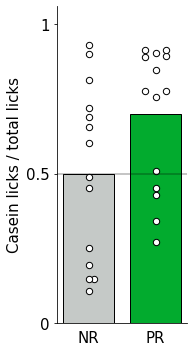

In [60]:
# Casein Preference Test 1

N=1
mNR = (0.5)
mPR = (0.7)
sNR = (0.656092555, 0.488791793, 0.688574939, 0.148148148, 0.450381679, 0.931294118, 0.14650974, 0.106493506, 0.717976319, 0.81238504, 0.192320103, 0.603206413, 0.901275652, 0.25)
sPR = (0.756225426, 0.77647589, 0.913664287, 0.847421422, 0.893170927, 0.775, 0.340226297, 0.269969666, 0.889364872, 0.904622586, 0.912850812, 0.426534769, 0.508424182, 0.453247144)

sc0 = (0, 0, 0, 0.01, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
sc36 = (0.13, 0.15, 0.11, 0.13, 0.15, 0.11, 0.13, 0.13, 0.11, 0.13, 0.15, 0.13, 0.13, 0.13)

ind = np.arange(N)   
width = 0.1   

fig, ax = plt.subplots(figsize=(2.8, 5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_ylabel('Casein licks / total licks', fontsize=15)

ax.set_xticks([ind, ind+width+0.03])
ax.set_xticklabels(('NR', 'PR'), fontsize=15)

bar1 = ax.bar(ind, mNR,  width, color= 'xkcd:silver',
             align='center', label='NR', edgecolor='black', alpha=1, zorder=-1)

bar2 = ax.bar(ind+width+0.03, mPR, width, color='xkcd:kelly green', 
            align='center', label='PR', edgecolor='black', alpha=1, zorder=-1)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False)        # ticks along the top edge are off
 
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels(('0', '0.5', '1'), fontsize=15)
ax.set_ylim([0, 1.06])
plt.tick_params(labelsize=15)
plt.axhline(0.5, color='black', alpha=0.3)
ax.scatter(sc0, sNR, facecolors=['white'], edgecolors='black', s=40, alpha=1, linewidth=1)
ax.scatter(sc36, sPR, facecolors=['white'], edgecolors='black', s=40, alpha=1, linewidth=1)  
#plt.title('Casein preference', fontsize=15)

plt.tight_layout()
plt.savefig('CasPref_IPP2-3_Test1.pdf', format='pdf', dpi=800)
plt.show()

# Casein preference over tests

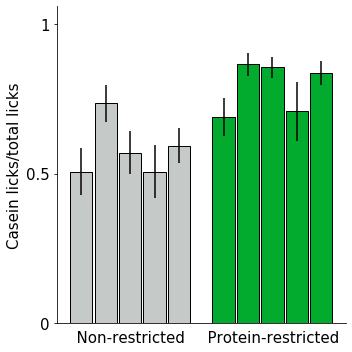

In [27]:

av_NR_test1 = [0.5067]
av_NR_test2 = [0.7349]
av_NR_test3 = [0.5704]
av_NR_test4 = [0.5066]
av_NR_test5 = [0.5935]

av_PR_test1 = [0.6905]
av_PR_test2 = [0.8656]
av_PR_test3 = [0.8563]
av_PR_test4 = [0.7079]
av_PR_test5 = [0.838]

err_NR_test1 = [0.07864]
err_NR_test2 = [0.06254]
err_NR_test3 = [0.07225]
err_NR_test4 = [0.08942]
err_NR_test5 = [0.0586]

err_PR_test1 = [0.06324]
err_PR_test2 = [0.03912]
err_PR_test3 = [0.0348]
err_PR_test4 = [0.09977]
err_PR_test5 = [0.04018]

width = 0.5    
xvals = [0.5, 1.05, 1.6, 2.15, 2.7, 3.7, 4.25, 4.8, 5.35, 5.9]

fig, ax = plt.subplots()
fig.set_size_inches((5, 5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

ax.set_ylabel('Casein licks/total licks', fontsize=15)

#ax.set_xticklabels(('  Cas. Malt.', '   Cas. Malt.'), fontsize=10)


bar1 = ax.bar(xvals[0], av_NR_test1,  width, color='xkcd:silver',  
            align='center', label='Non-restricted', edgecolor='black', alpha=1, zorder=-1, yerr=err_NR_test1)
bar2 = ax.bar(xvals[1], av_NR_test2,  width, color='xkcd:silver',
           align='center', label='Non-restricted', edgecolor='black', alpha=1, zorder=-1, yerr=err_NR_test2)
bar3 = ax.bar(xvals[2], av_NR_test3,  width, color='xkcd:silver',
           align='center', label='Non-restricted', edgecolor='black', alpha=1, zorder=-1, yerr=err_NR_test3)
bar4 = ax.bar(xvals[3], av_NR_test4, width, color='xkcd:silver',
           align='center', label='Non-restricted', edgecolor='black', alpha=1, zorder=-1, yerr=err_NR_test4)
bar5 = ax.bar(xvals[4], av_NR_test5, width, color='xkcd:silver',
           align='center', label='Non-restricted', edgecolor='black', alpha=1, zorder=-1, yerr=err_NR_test5)

bar6 = ax.bar(xvals[5], av_PR_test1,  width, color='xkcd:kelly green',
           align='center', label='Protein-restricted', edgecolor='black', alpha=1, zorder=-1, yerr=err_PR_test1)
bar7 = ax.bar(xvals[6], av_PR_test2,  width, color='xkcd:kelly green',
           align='center', label='Protein-restricted', edgecolor='black', alpha=1, zorder=-1, yerr=err_PR_test2)
bar8 = ax.bar(xvals[7], av_PR_test3, width, color='xkcd:kelly green',
           align='center', label='Protein-restricted', edgecolor='black', alpha=1, zorder=-1, yerr=err_PR_test3)
bar9 = ax.bar(xvals[8], av_PR_test4,  width, color='xkcd:kelly green',
           align='center', label='Protein-restricted', edgecolor='black', alpha=1, zorder=-1, yerr=err_PR_test4)
bar10 = ax.bar(xvals[9], av_PR_test5,  width, color='xkcd:kelly green',
           align='center', label='Protein-restricted', edgecolor='black', alpha=1, zorder=-1, yerr=err_PR_test5)

ax.set_ylim([0, 1.06])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels(('0', '0.5', '1'), fontsize=15)
ax.set_xticklabels([])

plt.tick_params(labelsize=15)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False) 
ax.set_xticks([1.5, 3])
ax.set_xticklabels(('  Non-restricted', '                                  Protein-restricted'), fontsize=15)
     


#plt.title('Preference Test', fontsize=15)
plt.tight_layout()
plt.savefig('IPP2-3_cas pref_5tests.png', dpi=800)
plt.show()

# Palatability - Licks / cluster in NR over preference tests

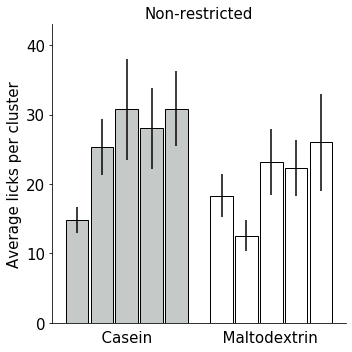

In [7]:
av_test1_cas = [14.81]
av_test2_cas = [25.37]
av_test3_cas = [30.78]
av_test4_cas = [28.01]
av_test5_cas = [30.86]

err_test1_cas = [1.81]
err_test2_cas = [4.05]
err_test3_cas = [7.29]
err_test4_cas = [5.82]
err_test5_cas = [5.39]

av_test1_mal = [18.32]
av_test2_mal = [12.54]
av_test3_mal = [23.2]
av_test4_mal = [22.31]
av_test5_mal = [25.99]

err_test1_mal = [3.12]
err_test2_mal = [2.21]
err_test3_mal = [4.79]
err_test4_mal = [4.07]
err_test5_mal = [6.93]

width = 0.5    
xvals = [0.5, 1.05, 1.6, 2.15, 2.7, 3.7, 4.25, 4.8, 5.35, 5.9]

fig, ax = plt.subplots()
fig.set_size_inches((5, 5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

ax.set_ylabel('Average licks per cluster', fontsize=15)

#ax.set_xticklabels(('  Cas. Malt.', '   Cas. Malt.'), fontsize=10)


bar1 = ax.bar(xvals[0], av_test1_cas,  width, color='xkcd:silver',  
            align='center', label='Casein', edgecolor='black', alpha=1, zorder=-1, yerr=err_test1_cas)
bar2 = ax.bar(xvals[1], av_test2_cas,  width, color='xkcd:silver',
           align='center', label='Casein', edgecolor='black', alpha=1, zorder=-1, yerr=err_test2_cas)
bar3 = ax.bar(xvals[2], av_test3_cas,  width, color='xkcd:silver',
           align='center', label='Casein', edgecolor='black', alpha=1, zorder=-1, yerr=err_test3_cas)
bar4 = ax.bar(xvals[3], av_test4_cas, width, color='xkcd:silver',
           align='center', label='Casein', edgecolor='black', alpha=1, zorder=-1, yerr=err_test4_cas)
bar5 = ax.bar(xvals[4], av_test5_cas, width, color='xkcd:silver',
           align='center', label='Casein', edgecolor='black', alpha=1, zorder=-1, yerr=err_test5_cas)

bar6 = ax.bar(xvals[5], av_test1_mal,  width, color='white',
           align='center', label='Maltodextrin', edgecolor='black', alpha=1, zorder=-1, yerr=err_test1_mal)
bar7 = ax.bar(xvals[6], av_test2_mal,  width, color='white',
           align='center', label='Maltodextrin', edgecolor='black', alpha=1, zorder=-1, yerr=err_test2_mal)
bar8 = ax.bar(xvals[7], av_test3_mal,  width, color='white',
           align='center', label='Maltodextrin', edgecolor='black', alpha=1, zorder=-1, yerr=err_test3_mal)
bar9 = ax.bar(xvals[8], av_test4_mal,  width, color='white',
           align='center', label='Maltodextrin', edgecolor='black', alpha=1, zorder=-1, yerr=err_test4_mal)
bar10 = ax.bar(xvals[9], av_test5_mal,  width, color='white',
           align='center', label='Maltodextrin', edgecolor='black', alpha=1, zorder=-1, yerr=err_test5_mal)

ax.set_ylim([0, 43])
ax.set_yticks([0, 10, 20, 30, 40])
#ax.set_yticklabels(('0', '10', '20', '30'), fontsize=15)
ax.set_xticklabels([])

plt.tick_params(labelsize=15)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False) 
ax.set_xticks([1.5, 3])
ax.set_xticklabels(('  Casein', '                                  Maltodextrin'), fontsize=15)
     


plt.title('Non-restricted', fontsize=15)
plt.tight_layout()
plt.savefig('IPP2-3_licks per cluster_NR_5tests.pdf', dpi=800)
plt.show()

# Palatability - Licks / cluster in PR over preference tests

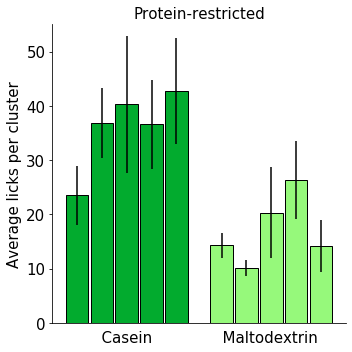

In [6]:
av_test1_cas = [23.53]
av_test2_cas = [36.84]
av_test3_cas = [40.25]
av_test4_cas = [36.56]
av_test5_cas = [42.80]

err_test1_cas = [5.42]
err_test2_cas = [6.49]
err_test3_cas = [12.66]
err_test4_cas = [8.13]
err_test5_cas = [9.78]

av_test1_mal = [14.26]
av_test2_mal = [10.03]
av_test3_mal = [20.33]
av_test4_mal = [26.38]
av_test5_mal = [14.13]

err_test1_mal = [2.35]
err_test2_mal = [1.48]
err_test3_mal = [8.41]
err_test4_mal = [7.22]
err_test5_mal = [4.76]

width = 0.5    
xvals = [0.5, 1.05, 1.6, 2.15, 2.7, 3.7, 4.25, 4.8, 5.35, 5.9]

fig, ax = plt.subplots()
fig.set_size_inches((5, 5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

ax.set_ylabel('Average licks per cluster', fontsize=15)




bar1 = ax.bar(xvals[0], av_test1_cas,  width, color='xkcd:kelly green',  
            align='center', label='Casein', edgecolor='black', alpha=1, zorder=-1, yerr=err_test1_cas)
bar2 = ax.bar(xvals[1], av_test2_cas,  width, color='xkcd:kelly green',
           align='center', label='Casein', edgecolor='black', alpha=1, zorder=-1, yerr=err_test2_cas)
bar3 = ax.bar(xvals[2], av_test3_cas,  width, color='xkcd:kelly green',
           align='center', label='Casein', edgecolor='black', alpha=1, zorder=-1, yerr=err_test3_cas)
bar4 = ax.bar(xvals[3], av_test4_cas, width, color='xkcd:kelly green',
           align='center', label='Casein', edgecolor='black', alpha=1, zorder=-1, yerr=err_test4_cas)
bar5 = ax.bar(xvals[4], av_test5_cas, width, color='xkcd:kelly green',
           align='center', label='Casein', edgecolor='black', alpha=1, zorder=-1, yerr=err_test5_cas)

bar6 = ax.bar(xvals[5], av_test1_mal,  width, color='xkcd:light green',
           align='center', label='Maltodextrin', edgecolor='black', alpha=1, zorder=-1, yerr=err_test1_mal)
bar7 = ax.bar(xvals[6], av_test2_mal,  width, color='xkcd:light green',
           align='center', label='Maltodextrin', edgecolor='black', alpha=1, zorder=-1, yerr=err_test2_mal)
bar8 = ax.bar(xvals[7], av_test3_mal,  width, color='xkcd:light green',
           align='center', label='Maltodextrin', edgecolor='black', alpha=1, zorder=-1, yerr=err_test3_mal)
bar9 = ax.bar(xvals[8], av_test4_mal,  width, color='xkcd:light green',
           align='center', label='Maltodextrin', edgecolor='black', alpha=1, zorder=-1, yerr=err_test4_mal)
bar10 = ax.bar(xvals[9], av_test5_mal,  width, color='xkcd:light green',
           align='center', label='Maltodextrin', edgecolor='black', alpha=1, zorder=-1, yerr=err_test5_mal)

ax.set_ylim([0, 55])
ax.set_yticks([0, 10, 20, 30, 40, 50])
#ax.set_yticklabels(('0', '10', '20', '30'), fontsize=15)
ax.set_xticklabels([])

plt.tick_params(labelsize=15)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False) 
ax.set_xticks([1.5, 3])
ax.set_xticklabels(('  Casein', '                                  Maltodextrin'), fontsize=15)
     


plt.title('Protein-restricted', fontsize=15)
plt.tight_layout()
plt.savefig('IPP2-3_licks per cluster_PR_5tests.pdf', dpi=800)
plt.show()

# licks per cluster test 1

C:\Users\gc214.UOL\AppData\Local\Continuum\anaconda3\ANACONDA\lib\site-packages\ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
C:\Users\gc214.UOL\AppData\Local\Continuum\anaconda3\ANACONDA\lib\site-packages\ipykernel_launcher.py:50: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


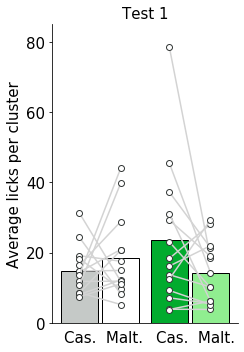

In [41]:
NR_cas = [19.11, 14.46, 14.75, 8.55, 11.8, 8.08, 16.41, 13.64, 18.27, 24.31, 10.64, 8.6, 31.25, 7.4]
NR_mal = [17.55, 20.86, 14.91, 20.63, 11.84, 12.17, 28.81, 44, 9.53, 8.27, 39.73, 5.21, 11.87, 11.1]
PR_cas = [7.12, 18.33, 78.61, 45.52, 37.27, 29.26, 16.15, 3.87, 23.07, 31.13, 9.22, 13.7, 3.77, 12.41]
PR_mal = [5.47, 28.08, 18.57, 14.29, 21.4, 18.94, 21.96, 3.8, 10.07, 6.11, 5.21, 10.21, 6.2, 29.33]

NR_cas_av = (14.81)
NR_mal_av = (18.32)
PR_cas_av = (23.53)
PR_mal_av = (14.26)

sc0 = (0, 0, 0, 0)
sc36 = (0.36, 0.36, 0.36, 0.36)
sc1 = (0.78, 0.78, 0.78, 0.78)
sc136 = (1.13, 1.13, 1.13, 1.13)



width = 0.5    
xvals = [0.5, 1.05, 1.70, 2.25]

fig, ax = plt.subplots(figsize=(3, 4))

fig.set_size_inches((3.5, 5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

ax.set_ylabel('Average licks per cluster', fontsize=15)
ax.set_xticks([0.7, 1.8])
ax.set_xticklabels(('    Cas.  Malt.', '        Cas.  Malt.'), fontsize=10)
ax.set_ylim(0, 80)

bar1 = ax.bar(xvals[0], NR_cas_av, width, color='xkcd:silver',  
            align='center', label='casein', edgecolor='black', alpha=1, zorder=-1)
bar2 = ax.bar(xvals[1], NR_mal_av, width, color='white',
           align='center', label='malto', edgecolor='black', alpha=1, zorder=-1)
bar3 = ax.bar(xvals[2], PR_cas_av, width, color='xkcd:kelly green',
           align='center', label='casein', edgecolor='black', alpha=1, zorder=-1)
bar4 = ax.bar(xvals[3], PR_mal_av, width, color='lightgreen',
           align='center', label='malto', edgecolor='black', alpha=1, zorder=-1)

plt.yticks([0, 20, 40, 60, 80], ["0", "20", "40", "60", "80"], fontsize=15)
plt.tick_params(labelsize=15)

for y1,y2 in zip(NR_cas, NR_mal):
    ax.plot([xvals[0], xvals[1]],[y1,y2], c='xkcd:charcoal', marker='o',markerfacecolor='w', color= 'lightgrey', markeredgecolor='xkcd:charcoal', markersize=6, zorder=20, alpha=1, clip_on=False)
    
for y1,y2 in zip(PR_cas, PR_mal):
    ax.plot([xvals[2], xvals[3]],[y1,y2],c='xkcd:charcoal', marker='o',markerfacecolor='w', color= 'lightgrey', markeredgecolor='xkcd:charcoal', markersize=6, zorder=20, alpha=1, clip_on=False)

    plt.tick_params(labelsize=15)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False) 

ax.set_ylim([0, 85])

plt.title('Test 1', fontsize=15)
plt.tight_layout()
plt.savefig('IPP2-3_licks_x_clusters_test1.pdf', dpi=800)
plt.show()

In [ ]:
def dividelicks(licks, time):
    before = [x for x in licks if x < time]
    after = [x for x in licks if x > time]
    
    return before, after



for i in rats:
    for j in ['s10']:
        
        x = rats[i].sessions[j]

        x.left['licks-forced'], x.left['licks-free'] = dividelicks(x.left['licks'], x.both['sipper'][0])
        x.right['licks-forced'], x.right['licks-free'] = dividelicks(x.right['licks'], x.both['sipper'][0])

df = pd.DataFrame([x for x in rats])